In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('crime_case.csv')

In [3]:
df

,States/UTs,Crime Head,Year,Cases pending investigation from previous year,Cases reported Under 156_3 during the year,Cases reported in Police Stations during the year,Cases reported during the year,No of victims in the registered cases,No of cases withdrawn by the Govt during investigation,Cases not investigated Under 157_1_b CRPC,...,Persons whose cases trials were completed during the year_Total,Persons convicted_Male,Persons convicted_Female,Persons convicted_Total,Persons acquitted_Male,Persons acquitted_Female,Persons acquitted_Total,Persons Discharged by Court_Male,Persons Discharged by Court_Female,Persons Discharged by Court_Total
0,Andhra Pradesh,1 - Rape (Section 376 IPC),2014,602,9,952,961,962,0,0,...,692,70,0,70,610,12,622,0,0,0
1,Andhra Pradesh,1.1 - Custodial Rape,2014,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Andhra Pradesh,1.1.1 - Custodial_Gang Rape,2014,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andhra Pradesh,1.1.2 - Custodial_Other Rape,2014,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Andhra Pradesh,1.2 - Rape other than Custodial,2014,602,9,952,961,962,0,0,...,692,70,0,70,610,12,622,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,Total (All India),14.2 - Under ITP Section 6,2014,9,0,81,81,121,0,0,...,75,8,20,28,26,21,47,0,0,0
1556,Total (All India),14.3 - Under ITP Section 7,2014,25,0,120,120,143,0,0,...,74,40,9,49,20,5,25,0,0,0
1557,Total (All India),14.4 - Under ITP Section 8,2014,4,0,104,104,114,0,0,...,143,43,57,100,28,15,43,0,0,0
1558,Total (All India),14.5 - Other Sections under ITP Act,2014,395,0,1160,1160,1488,0,0,...,1560,497,143,640,625,295,920,0,0,0


In [4]:
df['Crime Head'].unique()

array(['1 - Rape (Section 376 IPC)', '1.1 - Custodial Rape',
       '1.1.1 - Custodial_Gang Rape', '1.1.2 - Custodial_Other Rape',
       '1.2 - Rape other than Custodial', '1.2.1 - Rape_Gang Rape',
       '1.2.2 - Rape_Others',
       '2 - Attempt to commit Rape (Section 376 & 511 IPC)',
       '3 - Kidnapping & Abduction of Women (Section 363,364,364A, 366-369 IPC)',
       '3.1 - Kidnaping & Abduction Section 363 IPC',
       '3.2 - Kidnaping & Abduction in order to Murder Section 364 IPC',
       '3.3 - Kidnapping for Ransom Section 364A',
       '3.4 - Kidnapping & Abduction of Women to compel her for marriage',
       '3.5 - Kidnapping & Abduction of Women-Other',
       '4 - Dowry Deaths (Section 304-B IPC)',
       '5 - Assault on Women with intent to outrage her Modesty_Total (Section 354 IPC)',
       '5.1 - Sexual Harassment',
       '5.2 - Assault on women with intent to Disrobe', '5.3 - Voyeurism',
       '5.4 - Stalking', '5.5 - Others',
       '6 - Insult to the Modesty 

In [5]:
df['States/UTs'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'A & N Islands', 'Chandigarh',
       'D&N Haveli', 'Daman & Diu', 'Delhi UT', 'Lakshadweep',
       'Puducherry', 'Total (States)', 'Total (UTs)', 'Total (All India)'],
      dtype=object)

In [6]:
df.columns

Index(['States/UTs', 'Crime Head', 'Year',
       'Cases pending investigation from previous year',
       'Cases reported Under 156_3 during the year',
       'Cases reported in Police Stations during the year',
       'Cases reported during the year',
       'No of victims in the registered cases',
       'No of cases withdrawn by the Govt during investigation',
       'Cases not investigated Under 157_1_b CRPC',
       'Cases transferred to other Police Station or Magistrate',
       'Cases ended as final report false',
       'Cases ended as mistake of fact or of law',
       'Cases in ended as final report as Non Cognizable Submitted',
       'Cases Chargesheeted Out of Cases During the Year',
       'Cases Chargesheeted Out of Cases from Previous Year',
       'Cases Chargesheeted',
       'Cases Not Chargesheeted but final report Submitted',
       'Total cases Investigated',
       'Cases pending investigation at the end of the year',
       'Cases pending trial from the previo

In [7]:
dum=pd.get_dummies(df['Crime Head']) 
df=pd.concat([dum,df],axis=1)


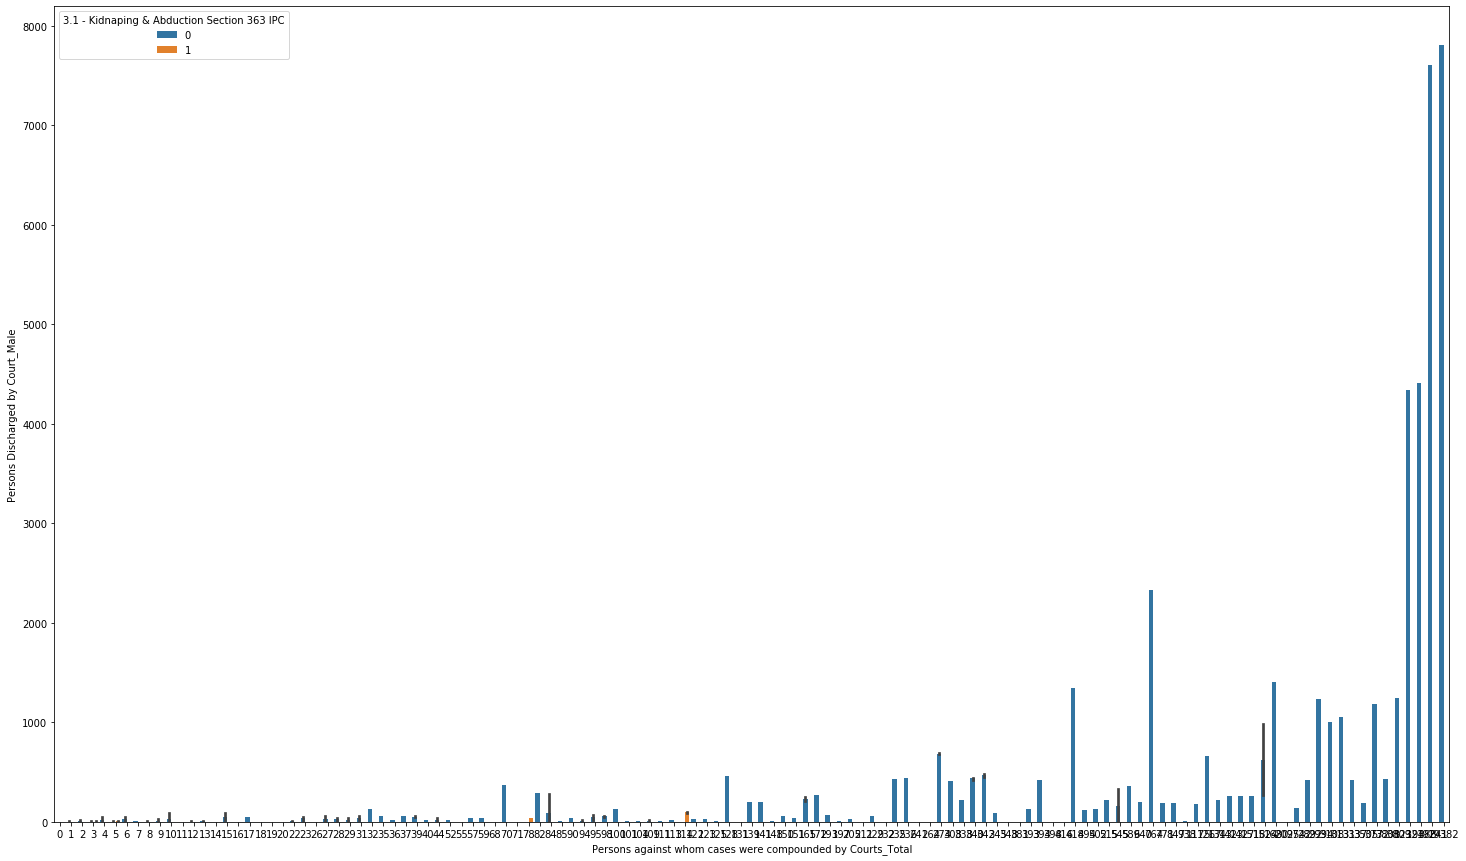

In [8]:
plt.figure(figsize=(25,15))
sns.barplot(df['Persons against whom cases were compounded by Courts_Total'],df['Persons Discharged by Court_Male'],hue=df['3.1 - Kidnaping & Abduction Section 363 IPC'])

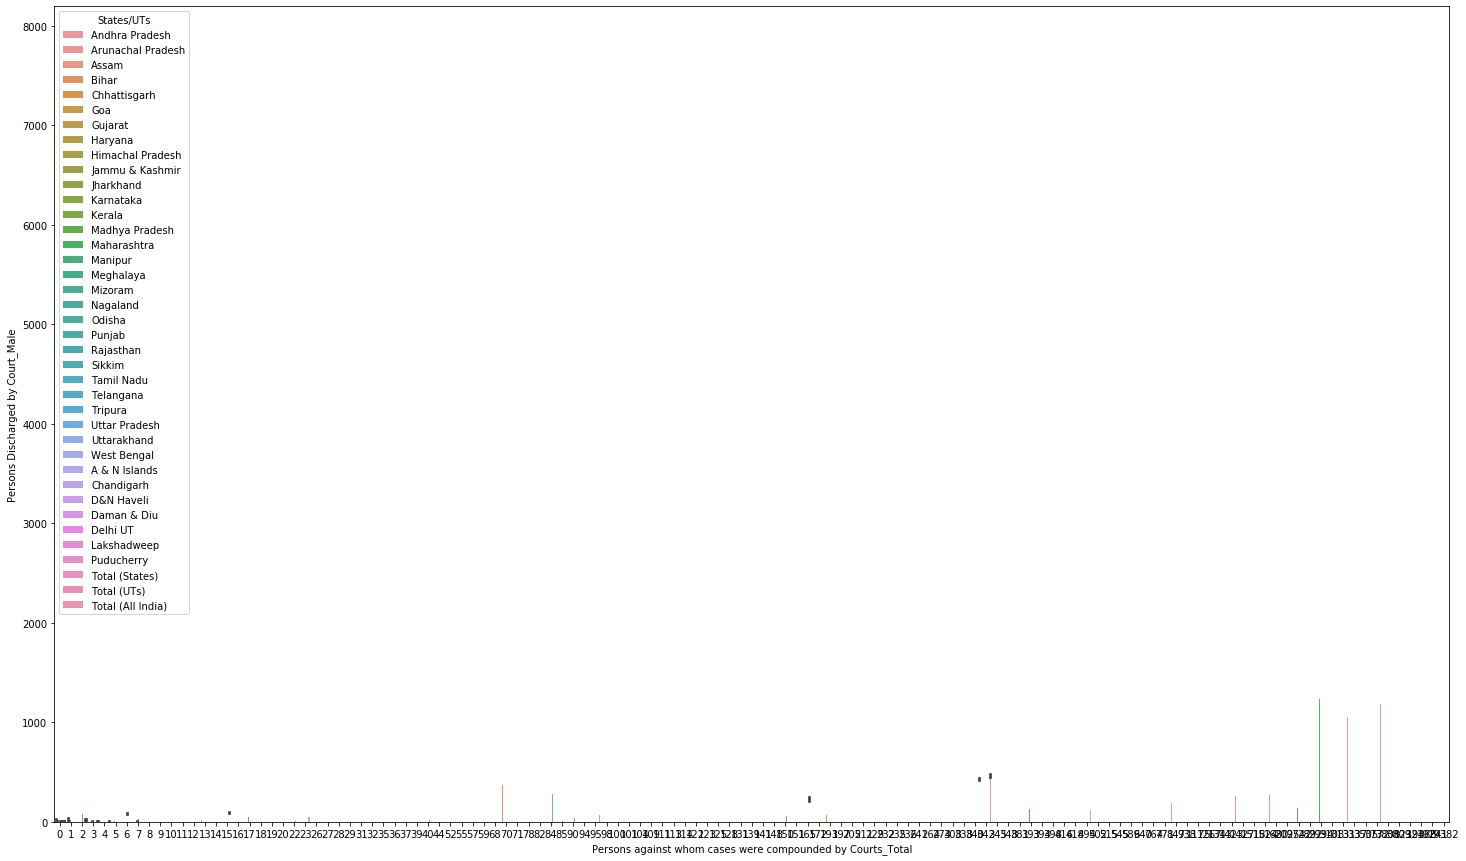

In [9]:
plt.figure(figsize=(25,15))
sns.barplot(df['Persons against whom cases were compounded by Courts_Total'],df['Persons Discharged by Court_Male'],hue=df['States/UTs'])

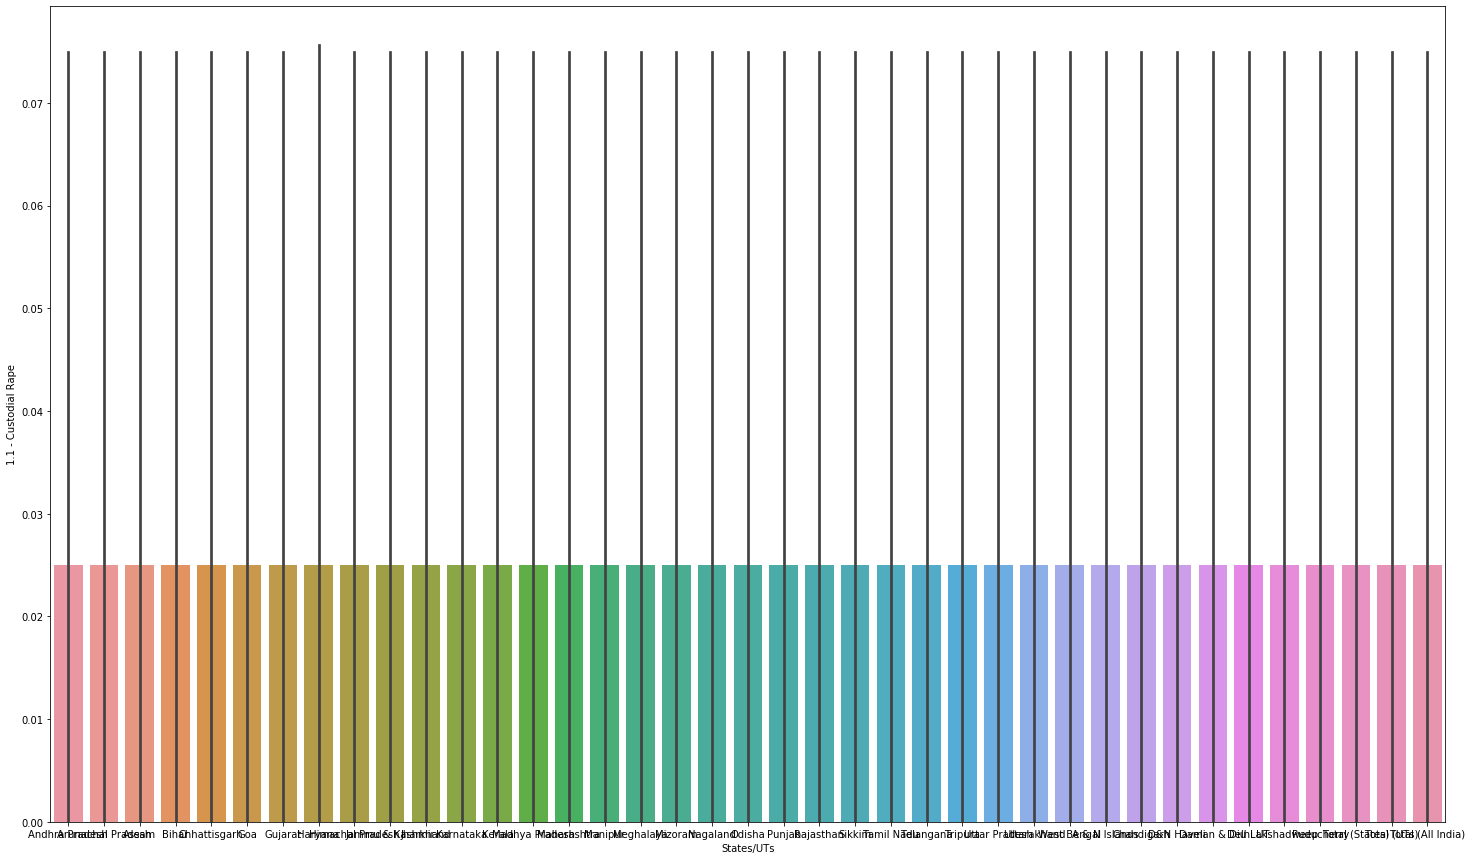

In [10]:
plt.figure(figsize=(25,15))
sns.barplot(df['States/UTs'],df['1.1 - Custodial Rape'])

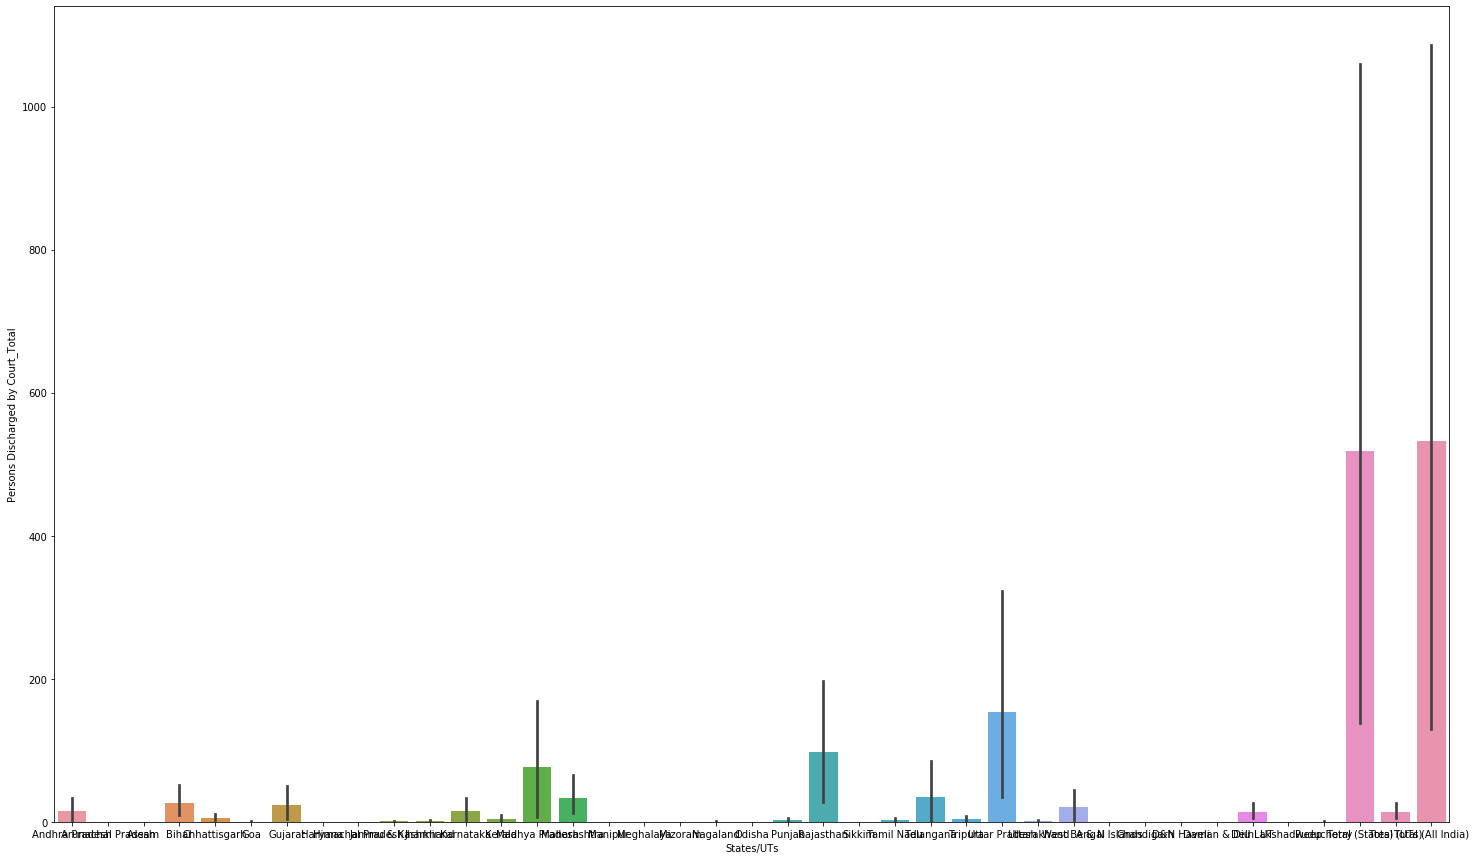

In [11]:
plt.figure(figsize=(25,15))
sns.barplot(df['States/UTs'],df['Persons Discharged by Court_Total'])

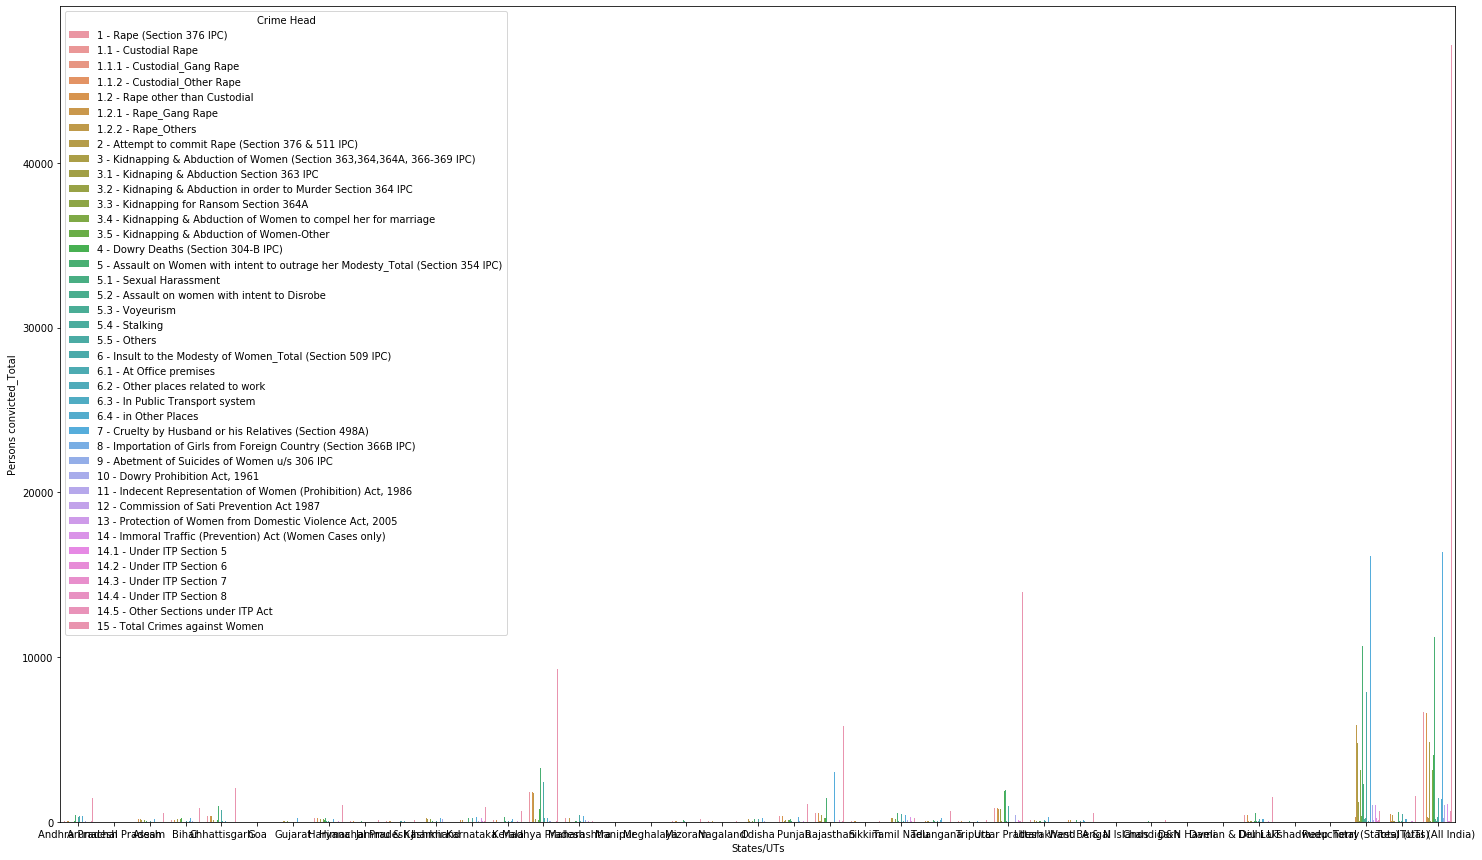

In [12]:
plt.figure(figsize=(25,15))
sns.barplot(df['States/UTs'],df['Persons convicted_Total'],hue=df['Crime Head'])

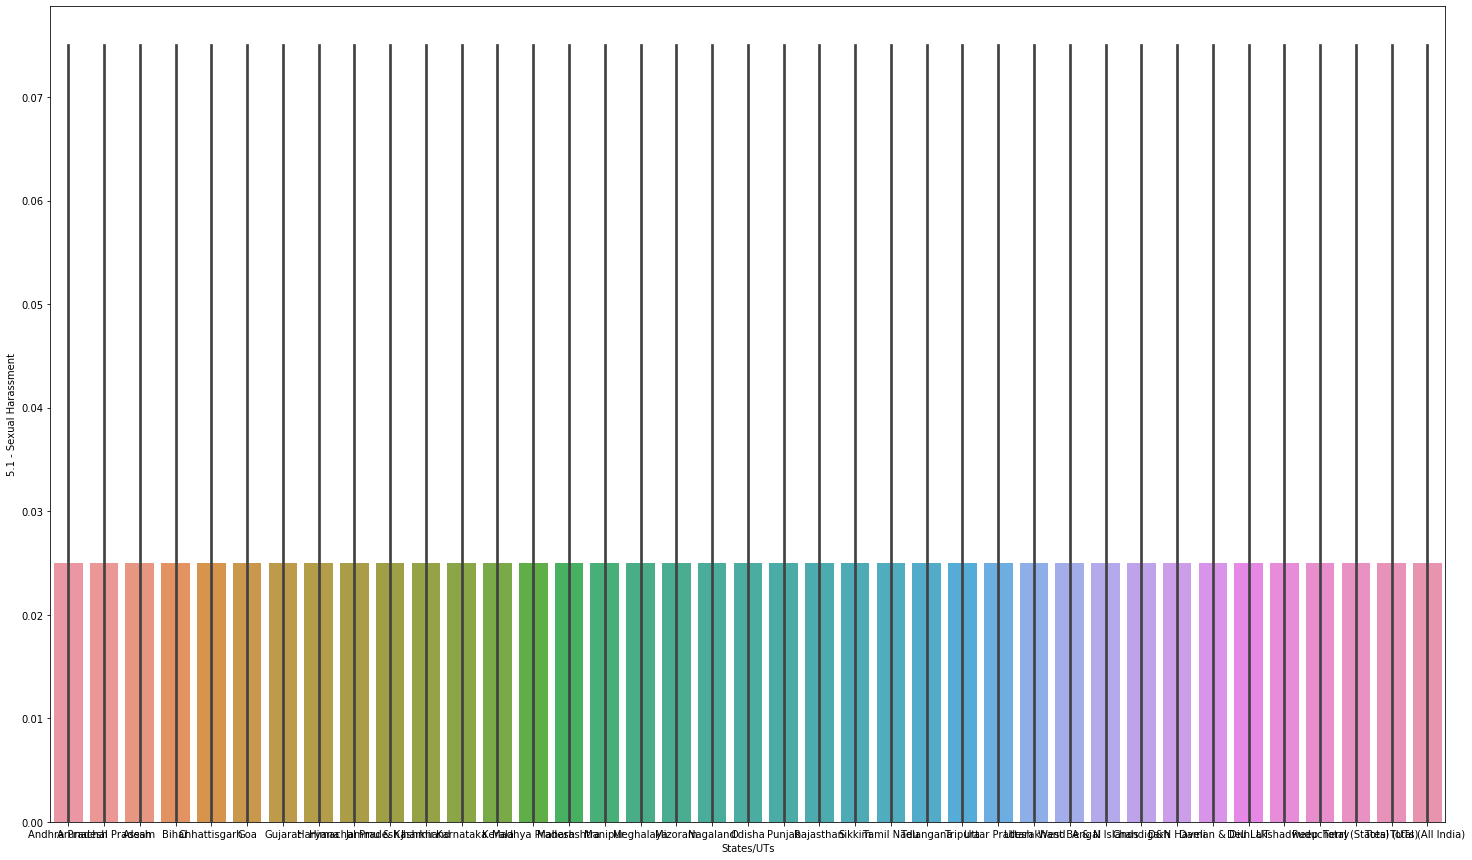

In [13]:
plt.figure(figsize=(25,15))
sns.barplot(df['States/UTs'],df['5.1 - Sexual Harassment'])

In [14]:
le=LabelEncoder()
df['States/UTs']=le.fit_transform(df['States/UTs'])

In [15]:
df

,1 - Rape (Section 376 IPC),1.1 - Custodial Rape,1.1.1 - Custodial_Gang Rape,1.1.2 - Custodial_Other Rape,1.2 - Rape other than Custodial,1.2.1 - Rape_Gang Rape,1.2.2 - Rape_Others,"10 - Dowry Prohibition Act, 1961","11 - Indecent Representation of Women (Prohibition) Act, 1986",12 - Commission of Sati Prevention Act 1987,...,Persons whose cases trials were completed during the year_Total,Persons convicted_Male,Persons convicted_Female,Persons convicted_Total,Persons acquitted_Male,Persons acquitted_Female,Persons acquitted_Total,Persons Discharged by Court_Male,Persons Discharged by Court_Female,Persons Discharged by Court_Total
0,1,0,0,0,0,0,0,0,0,0,...,692,70,0,70,610,12,622,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,692,70,0,70,610,12,622,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,0,0,0,0,0,0,0,0,0,0,...,75,8,20,28,26,21,47,0,0,0
1556,0,0,0,0,0,0,0,0,0,0,...,74,40,9,49,20,5,25,0,0,0
1557,0,0,0,0,0,0,0,0,0,0,...,143,43,57,100,28,15,43,0,0,0
1558,0,0,0,0,0,0,0,0,0,0,...,1560,497,143,640,625,295,920,0,0,0


In [16]:
dfcor=df.corr()

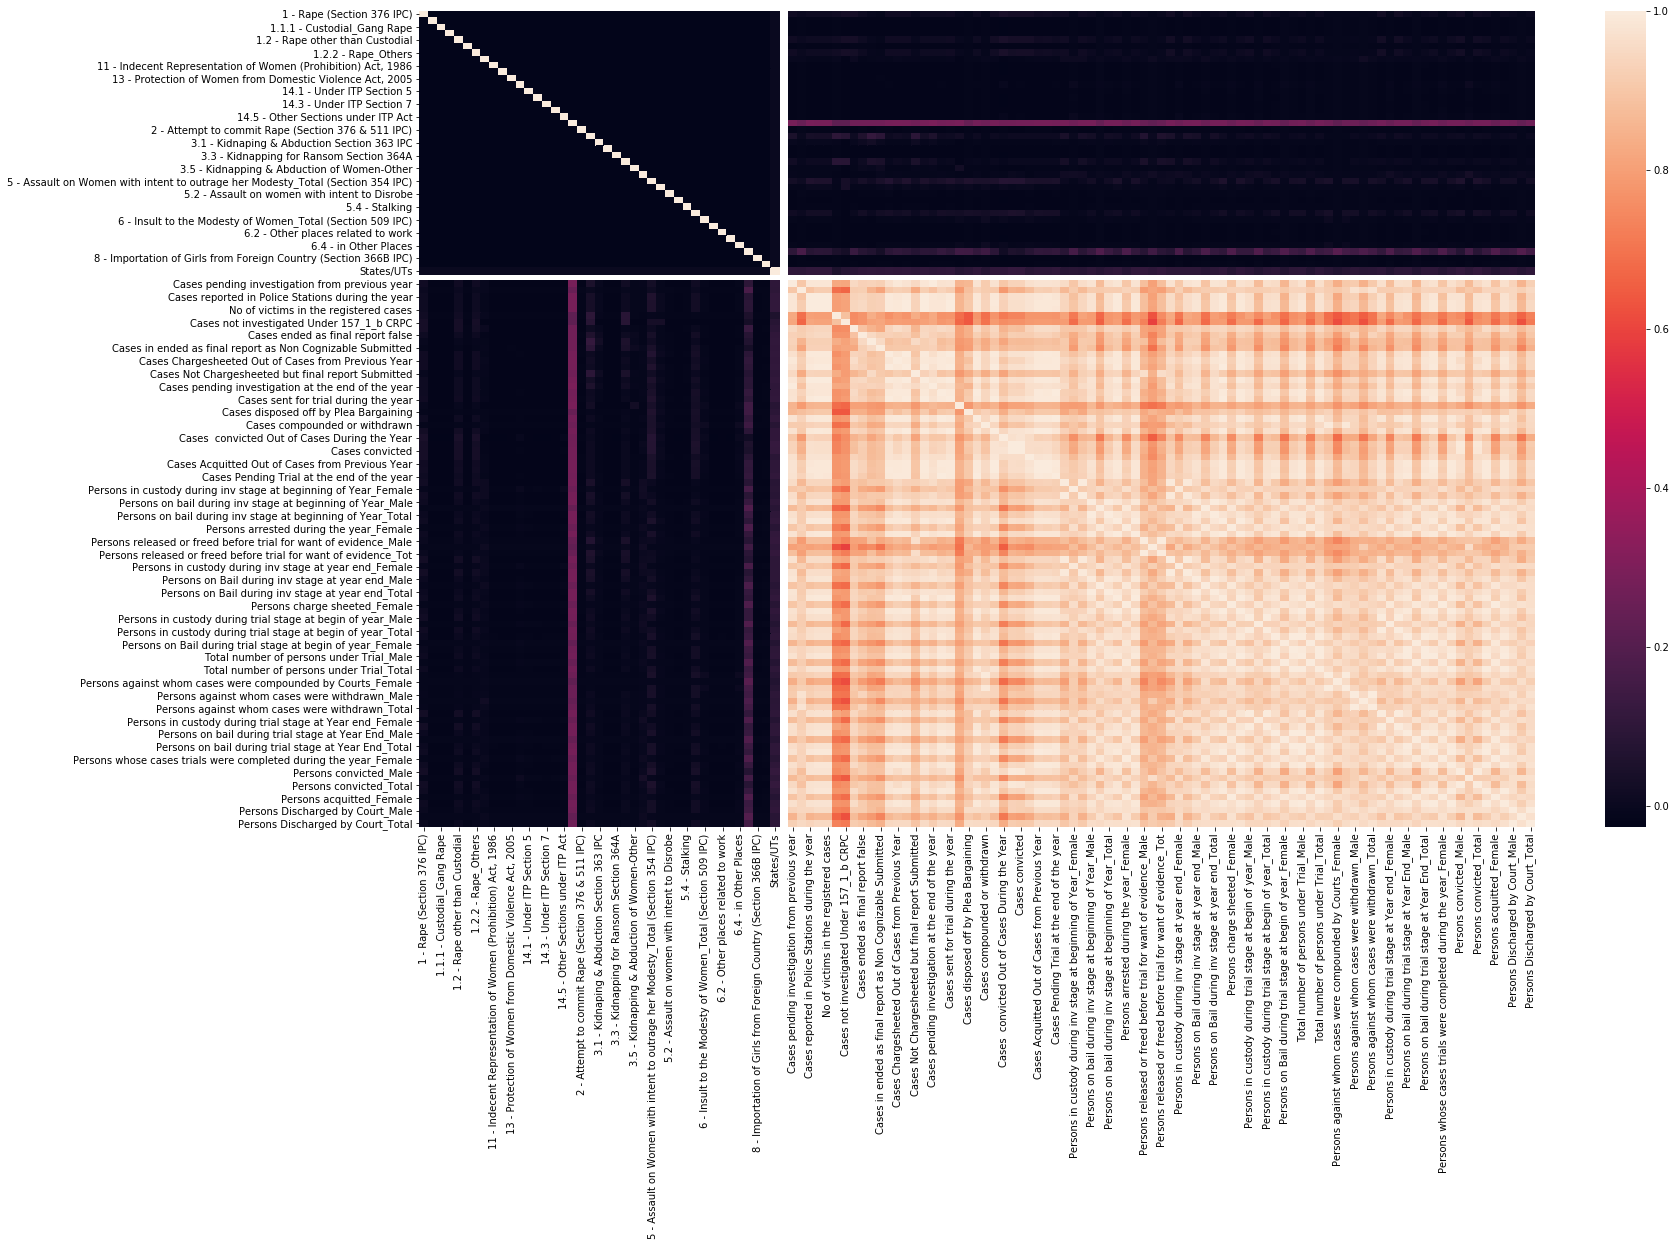

In [17]:
plt.figure(figsize=(25,15))
sns.heatmap(dfcor)

In [28]:
df.skew()

1 - Rape (Section 376 IPC)             6.090728
1.1 - Custodial Rape                   6.090728
1.1.1 - Custodial_Gang Rape            6.090728
1.1.2 - Custodial_Other Rape           6.090728
1.2 - Rape other than Custodial        6.090728
                                        ...    
Persons acquitted_Female              18.573941
Persons acquitted_Total               19.421538
Persons Discharged by Court_Male      18.189348
Persons Discharged by Court_Female    17.685524
Persons Discharged by Court_Total     18.201178
Length: 127, dtype: float64

In [51]:
le=LinearRegression()
df.drop('Crime Head',inplace=True,axis=1)

In [52]:
x=df.drop('Persons Discharged by Court_Total',axis=1)
y=df['Persons Discharged by Court_Total']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [54]:
x_train.shape

(1045, 126)

In [55]:
le.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
le.coef_

array([ 2.41154434e-02,  2.41154434e-02,  2.41154434e-02,  2.41154434e-02,
        2.41154434e-02,  2.41154434e-02,  2.41154434e-02,  2.41154434e-02,
        2.41154434e-02,  2.41154434e-02,  2.41154434e-02,  2.41154434e-02,
        2.41154434e-02,  2.41154434e-02,  2.41154434e-02,  2.41154434e-02,
        2.41154434e-02,  2.41154434e-02,  2.41154434e-02,  2.41154434e-02,
        2.41154434e-02,  2.41154434e-02,  2.41154434e-02,  2.41154434e-02,
        2.41154434e-02,  2.41154434e-02,  2.41154434e-02,  2.41154434e-02,
        2.41154434e-02,  2.41154434e-02,  2.41154434e-02,  2.41154434e-02,
        2.41154434e-02,  2.41154434e-02,  2.41154434e-02,  2.41154434e-02,
        2.41154434e-02,  2.41154433e-02,  2.41154434e-02,  2.41154434e-02,
        2.55079258e-12, -1.66533454e-16,  4.16052557e-11,  1.23914047e-11,
        1.29153858e-11,  2.78787037e-11,  1.69188361e-12,  1.85284756e-10,
        8.93136036e-12, -5.42629143e-11, -9.66055361e-12, -1.06692320e-11,
       -7.72745507e-12,  

In [57]:
le.intercept_

-0.024115443404255643

In [58]:
le.score(x_train,y_train)

1.0

In [62]:
pred=le.predict(x_test)
print('Predicted',pred)
print("Actual",y_test)


Predicted [ 2.30000000e+01  4.40000000e+01 -1.83324467e-11  8.37441921e-12
  1.73687453e-11  1.60000000e+01 -2.52025935e-11 -1.03263176e-10
 -1.86028692e-11  5.00000000e+00 -6.53752608e-11 -9.53061241e-12
  5.99198469e-12  1.03000000e+02  2.71734441e-11 -1.04330294e-11
  2.01663027e-11  4.40000000e+01  2.11195506e-11 -3.35962369e-11
  2.19139429e-11  2.40000000e+01 -1.91473504e-11  5.18041166e-12
  2.76418471e-12  2.00000000e+00 -2.38098430e-12 -1.11927412e-11
 -2.32611222e-11  4.48107662e-11  7.05515646e-11  6.70000000e+01
 -1.27831634e-11  6.99587610e-12  5.48077139e-11  5.36922451e-11
  1.00000000e+00  5.14120690e-11  1.00000000e+00  2.77593296e-11
 -4.26658153e-11  7.00000000e+00  1.53015378e-11  1.63746794e-12
  9.94582194e-12  5.79882808e-11  5.24447152e-12  2.26055771e-11
 -4.16888746e-12 -1.97596488e-11 -1.87998228e-11 -2.46204376e-11
 -2.59497875e-11 -9.33475519e-13 -1.32407661e-11 -3.81161769e-12
  3.11999315e-11 -8.08713096e-11  2.55078632e-11  5.26813732e-11
  2.00000000e+0

In [63]:
print("Errors:")
print("Mean Squered",mean_squared_error(y_test,pred))
print("Mean absulate",mean_absolute_error(y_test,pred))
print("RMS",np.sqrt(mean_squared_error(y_test,pred)))

Errors:
Mean Squered 2.62594471327088e-19
Mean absulate 1.838228575020792e-10
RMS 5.124397245794749e-10


In [64]:
r2_score(y_test,pred)

1.0

In [66]:
from sklearn.model_selection import cross_val_score
dtscore=cross_val_score(le,x,y,cv=4)
print('cross validation=',dtscore)
print(dtscore.mean(),dtscore.std())

cross validation= [1. 1. 1. 1.]
1.0 0.0
